<a href="https://www.kaggle.com/code/rahulchauhan016/grammy-awards-eda-visualization-ml-1959-2026?scriptVersionId=298412739" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🎵 Grammy Awards Analysis (1959–2026)
##  EDA · 3D Visualizations · Machine Learning

> **Dataset:** Grammy Award Winners scraped from Wikipedia  
> **Goal:** Discover trends, top artists, category dynamics and predict award groups

---

## 📦 1 — Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)

# ── Global Style ──────────────────────────────────────────────────────────────
PALETTE      = ['#FFD700','#C0C0C0','#CD7F32','#4A90E2','#E74C3C','#2ECC71']
BG_COLOR     = '#0f0f1a'
TEXT_COLOR   = '#f0f0f0'
GOLD         = '#FFD700'

plt.rcParams.update({
    'figure.figsize'     : (14, 6),
    'figure.facecolor'   : BG_COLOR,
    'axes.facecolor'     : '#1a1a2e',
    'axes.edgecolor'     : '#333355',
    'axes.labelcolor'    : TEXT_COLOR,
    'axes.titlecolor'    : GOLD,
    'axes.titlesize'     : 14,
    'axes.titlepad'      : 12,
    'xtick.color'        : TEXT_COLOR,
    'ytick.color'        : TEXT_COLOR,
    'text.color'         : TEXT_COLOR,
    'grid.color'         : '#2a2a3e',
    'grid.linestyle'     : '--',
    'grid.alpha'         : 0.5,
    'font.family'        : 'DejaVu Sans',
    'legend.facecolor'   : '#1a1a2e',
    'legend.edgecolor'   : '#333355',
    'legend.labelcolor'  : TEXT_COLOR,
})

PLOTLY_TEMPLATE = dict(
    layout=go.Layout(
        paper_bgcolor=BG_COLOR,
        plot_bgcolor='#1a1a2e',
        font=dict(color=TEXT_COLOR, family='Arial'),
        title_font=dict(color=GOLD, size=18),
        legend=dict(bgcolor='#1a1a2e', bordercolor='#333355'),
        xaxis=dict(gridcolor='#2a2a3e', zerolinecolor='#333355'),
        yaxis=dict(gridcolor='#2a2a3e', zerolinecolor='#333355'),
    )
)

print('✅  Libraries loaded successfully')

✅  Libraries loaded successfully


## 📂 2 — Load Dataset

In [2]:
PATH = "/kaggle/input/grammy-award-winners-1959-2026/Grammy_Awards_Winners_20260208_055452.csv"

df_raw = pd.read_csv(PATH)

print(f'Shape : {df_raw.shape}')
print(f'Columns : {list(df_raw.columns)}')
df_raw.head()

Shape : (311, 13)
Columns : ['Year', 'Ceremony_Number', 'Decade', 'Era', 'Category', 'Award_Group', 'Winner', 'Artist', 'Status', 'Total_Wins', 'Category_Total_Winners', 'Data_Source', 'Collection_Date']


,Year,Ceremony_Number,Decade,Era,Category,Award_Group,Winner,Artist,Status,Total_Wins,Category_Total_Winners,Data_Source,Collection_Date
0,2026,68,2020,2020s,Album of the Year,Big Four,Debí Tirar Más Fotos,Bad Bunny,Winner,1,69,Wikipedia,2026-02-08
1,2026,68,2020,2020s,Best New Artist,Big Four,Olivia Dean,Olivia Dean,Winner,1,67,Wikipedia,2026-02-08
2,2026,68,2020,2020s,Best Pop Vocal Album,Genre,"Lady Gaga Cirkut, Lady Gaga & Andrew Watt (pro...",Mayhem,Winner,1,33,Wikipedia,2026-02-08
3,2026,68,2020,2020s,Record of the Year,Big Four,Luther,Kendrick Lamar & SZA,Winner,1,69,Wikipedia,2026-02-08
4,2026,68,2020,2020s,Song of the Year,Big Four,Billie Eilish O'ConnellFinneas O'Connell,Wildflower,Winner,1,73,Wikipedia,2026-02-08


## 🔍 3 — Dataset Information & Quality Report

In [3]:
print('=== dtypes & non-null counts ===')
df_raw.info()
print()
print('=== Missing values ===')
missing = df_raw.isnull().sum()
print(missing[missing > 0] if missing.any() else 'No missing values 🎉')
print()
print('=== Numeric stats ===')
df_raw.describe().round(2)

=== dtypes & non-null counts ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    311 non-null    int64 
 1   Ceremony_Number         311 non-null    int64 
 2   Decade                  311 non-null    int64 
 3   Era                     311 non-null    object
 4   Category                311 non-null    object
 5   Award_Group             311 non-null    object
 6   Winner                  311 non-null    object
 7   Artist                  311 non-null    object
 8   Status                  311 non-null    object
 9   Total_Wins              311 non-null    int64 
 10  Category_Total_Winners  311 non-null    int64 
 11  Data_Source             311 non-null    object
 12  Collection_Date         311 non-null    object
dtypes: int64(5), object(8)
memory usage: 31.7+ KB

=== Missing values ===
No miss

,Year,Ceremony_Number,Decade,Total_Wins,Category_Total_Winners
count,311.00,311.00,311.00,311.00,311.00
mean,1994.70,36.70,1990.26,1.51,65.69
std,19.63,19.63,19.92,0.94,11.47
min,1959.00,1.00,1950.00,1.00,33.00
25%,1978.00,20.00,1970.00,1.00,67.00
50%,1996.00,38.00,1990.00,1.00,69.00
75%,2012.00,54.00,2010.00,2.00,69.00
max,2026.00,68.00,2020.00,5.00,73.00


## 🧹 4 — Data Cleaning

In [4]:
df = df_raw.copy()

# Remove duplicates
before = len(df)
df = df.drop_duplicates()
print(f'Dropped {before - len(df)} duplicate rows')

# Drop rows with critical nulls
df = df.dropna(subset=['Year', 'Artist', 'Category', 'Award_Group'])

# Coerce types
df['Year']      = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df['Decade']    = (df['Year'] // 10 * 10).astype(str) + 's'
df['Era']       = df['Era'].str.strip()
df['Artist']    = df['Artist'].str.strip()
df['Category']  = df['Category'].str.strip()

# Derived features
df['Is_Big_Four'] = (df['Award_Group'] == 'Big Four').astype(int)

print(f'\nClean dataset: {df.shape[0]} rows × {df.shape[1]} cols')
df.head()

Dropped 0 duplicate rows

Clean dataset: 311 rows × 14 cols


,Year,Ceremony_Number,Decade,Era,Category,Award_Group,Winner,Artist,Status,Total_Wins,Category_Total_Winners,Data_Source,Collection_Date,Is_Big_Four
0,2026,68,2020s,2020s,Album of the Year,Big Four,Debí Tirar Más Fotos,Bad Bunny,Winner,1,69,Wikipedia,2026-02-08,1
1,2026,68,2020s,2020s,Best New Artist,Big Four,Olivia Dean,Olivia Dean,Winner,1,67,Wikipedia,2026-02-08,1
2,2026,68,2020s,2020s,Best Pop Vocal Album,Genre,"Lady Gaga Cirkut, Lady Gaga & Andrew Watt (pro...",Mayhem,Winner,1,33,Wikipedia,2026-02-08,0
3,2026,68,2020s,2020s,Record of the Year,Big Four,Luther,Kendrick Lamar & SZA,Winner,1,69,Wikipedia,2026-02-08,1
4,2026,68,2020s,2020s,Song of the Year,Big Four,Billie Eilish O'ConnellFinneas O'Connell,Wildflower,Winner,1,73,Wikipedia,2026-02-08,1


## 📊 5 — Wins Per Year (Timeline)

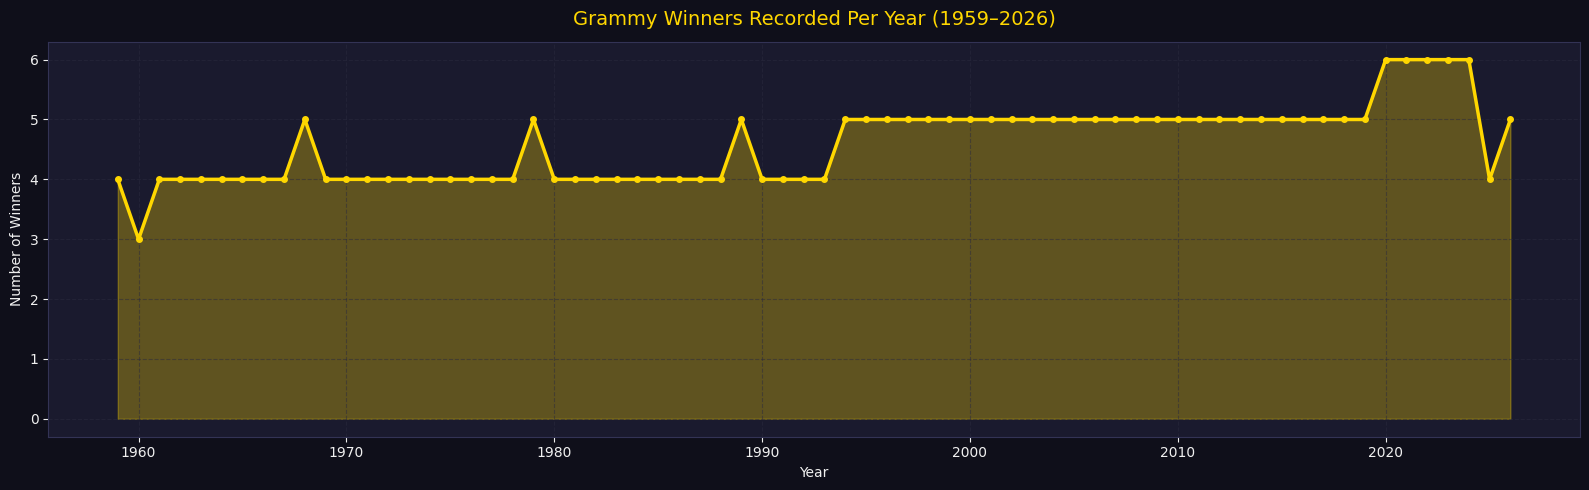

In [5]:
wins_per_year = df.groupby('Year').size().reset_index(name='Wins')

fig, ax = plt.subplots(figsize=(16, 5))

ax.fill_between(wins_per_year['Year'], wins_per_year['Wins'],
                alpha=0.3, color=GOLD)
ax.plot(wins_per_year['Year'], wins_per_year['Wins'],
        color=GOLD, linewidth=2.5, marker='o', markersize=4)

ax.set_title('Grammy Winners Recorded Per Year (1959–2026)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Winners')
ax.grid(True)
plt.tight_layout()
plt.show()

## 🏆 6 — Top 15 Artists by Total Wins

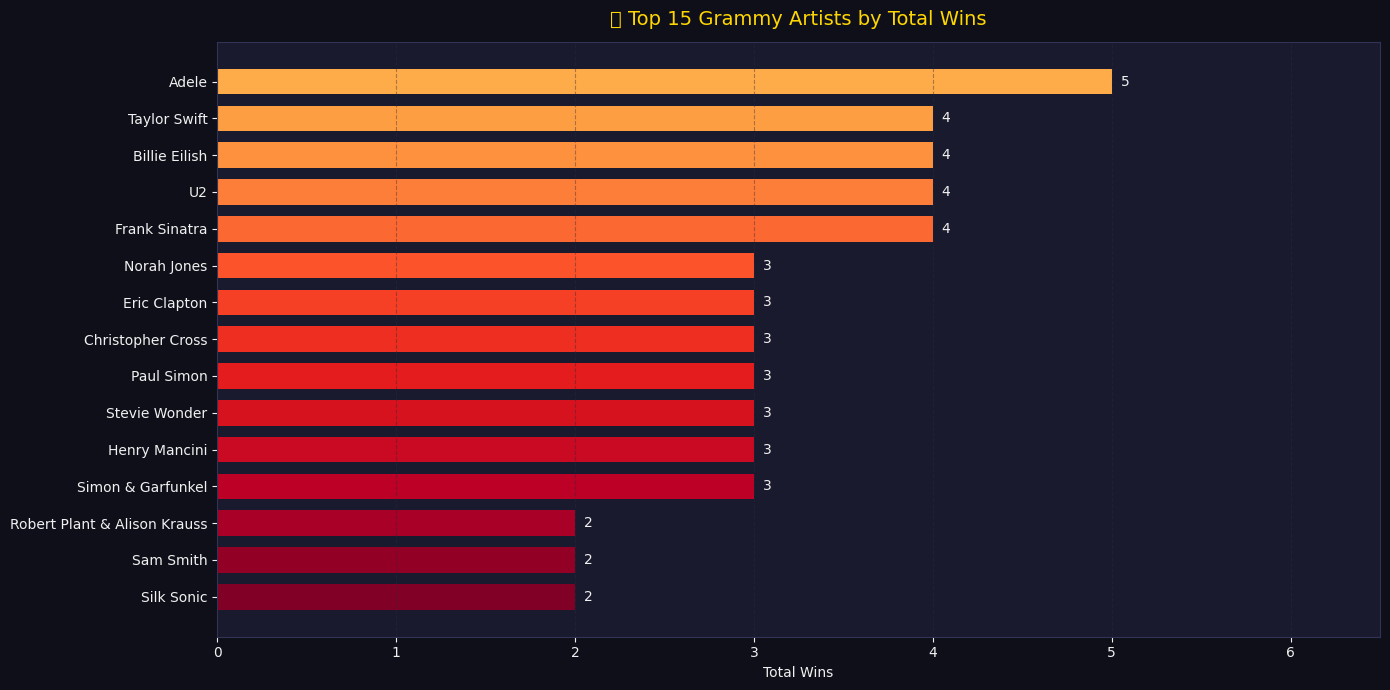

In [6]:
top_artists = df['Artist'].value_counts().head(15).reset_index()
top_artists.columns = ['Artist', 'Wins']

fig, ax = plt.subplots(figsize=(14, 7))

cmap   = plt.cm.YlOrRd(np.linspace(0.4, 1.0, len(top_artists)))
bars   = ax.barh(top_artists['Artist'][::-1],
                 top_artists['Wins'][::-1],
                 color=cmap[::-1], edgecolor='none', height=0.7)

for bar, val in zip(bars, top_artists['Wins'][::-1]):
    ax.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2,
            f'{val}', va='center', fontsize=10, color=TEXT_COLOR)

ax.set_title('🏆 Top 15 Grammy Artists by Total Wins')
ax.set_xlabel('Total Wins')
ax.set_xlim(0, top_artists['Wins'].max() + 1.5)
ax.grid(axis='x', alpha=0.4)
plt.tight_layout()
plt.show()

## 🎯 7 — Award Group Distribution

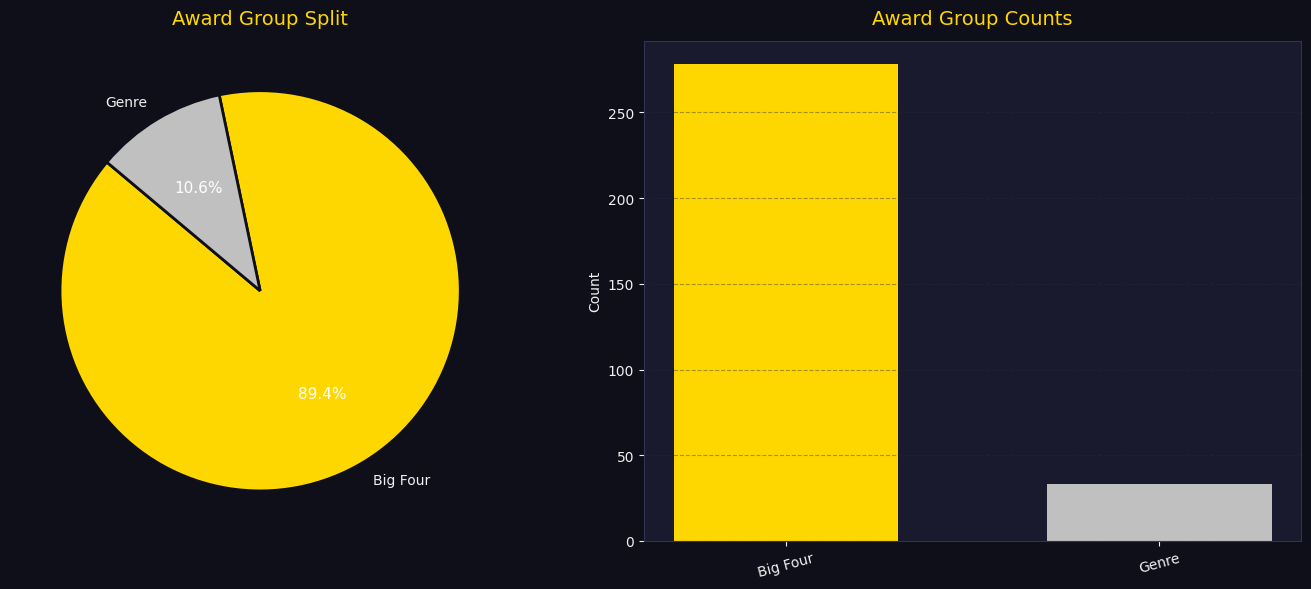

In [7]:
group_counts = df['Award_Group'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
wedges, texts, autotexts = axes[0].pie(
    group_counts, labels=group_counts.index,
    autopct='%1.1f%%', colors=PALETTE,
    startangle=140, wedgeprops=dict(edgecolor='#0f0f1a', linewidth=2)
)
for at in autotexts:
    at.set_color('white')
    at.set_fontsize(11)
axes[0].set_title('Award Group Split', color=GOLD)

# Bar chart
colors = PALETTE[:len(group_counts)]
axes[1].bar(group_counts.index, group_counts.values,
            color=colors, edgecolor='none', width=0.6)
axes[1].set_title('Award Group Counts', color=GOLD)
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(axis='y', alpha=0.4)

plt.tight_layout()
plt.show()

## 📈 8 — Decade-Wise Wins Breakdown

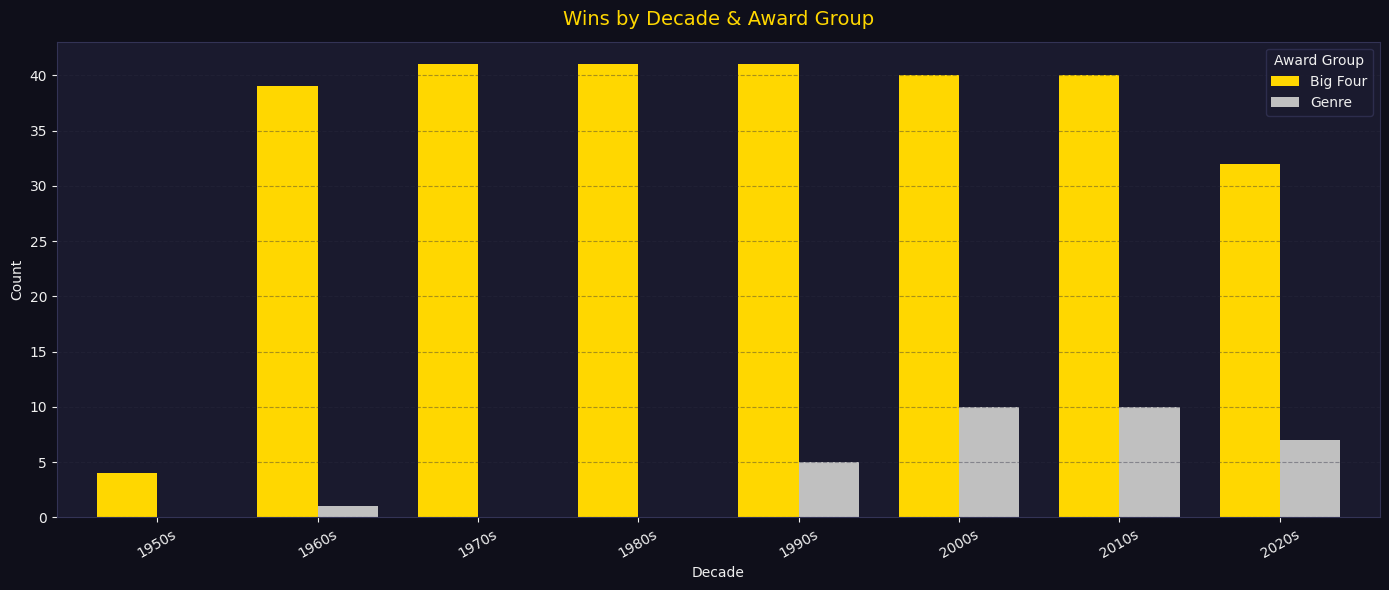

In [8]:
decade_group = df.groupby(['Decade', 'Award_Group']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 6))
decade_group.plot(kind='bar', ax=ax, color=PALETTE[:len(decade_group.columns)],
                  edgecolor='none', width=0.75)

ax.set_title('Wins by Decade & Award Group')
ax.set_xlabel('Decade')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=30)
ax.legend(title='Award Group', bbox_to_anchor=(1, 1))
ax.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

## 🌐 9 — Interactive Sunburst Chart (Era → Award Group → Category)

In [9]:
sunburst_df = df.groupby(['Era', 'Award_Group', 'Category']).size().reset_index(name='Count')

fig = px.sunburst(
    sunburst_df,
    path=['Era', 'Award_Group', 'Category'],
    values='Count',
    color='Count',
    color_continuous_scale='YlOrRd',
    title='🌐 Grammy Taxonomy: Era → Award Group → Category',
)
fig.update_layout(**PLOTLY_TEMPLATE['layout'].to_plotly_json())
fig.update_layout(height=600)
fig.show()

## 🗺️ 10 — Interactive Treemap (Award Group → Artist)

In [10]:
treemap_df = (
    df.groupby(['Award_Group', 'Artist'])
    .size()
    .reset_index(name='Wins')
    .query('Wins >= 2')
)

fig = px.treemap(
    treemap_df,
    path=['Award_Group', 'Artist'],
    values='Wins',
    color='Wins',
    color_continuous_scale='Plasma',
    title='🗺️ Artists with 2+ Wins — Grouped by Award Type',
)
fig.update_layout(**PLOTLY_TEMPLATE['layout'].to_plotly_json())
fig.update_layout(height=560)
fig.show()

## 🎬 11 — Animated Timeline: Category Wins Per Year

In [11]:
anim_df = (
    df.groupby(['Year', 'Award_Group'])
    .size()
    .reset_index(name='Wins')
)
anim_df['Year'] = anim_df['Year'].astype(str)

fig = px.bar(
    anim_df,
    x='Award_Group',
    y='Wins',
    color='Award_Group',
    animation_frame='Year',
    range_y=[0, anim_df['Wins'].max() + 2],
    color_discrete_sequence=PALETTE,
    title='🎬 Animated: Award Group Wins Per Year (1959–2026)',
    labels={'Award_Group': 'Award Group', 'Wins': 'Wins'},
)
fig.update_layout(**PLOTLY_TEMPLATE['layout'].to_plotly_json())
fig.update_layout(height=500, showlegend=False)
fig.show()

## 🎨 12 — Correlation Heatmap

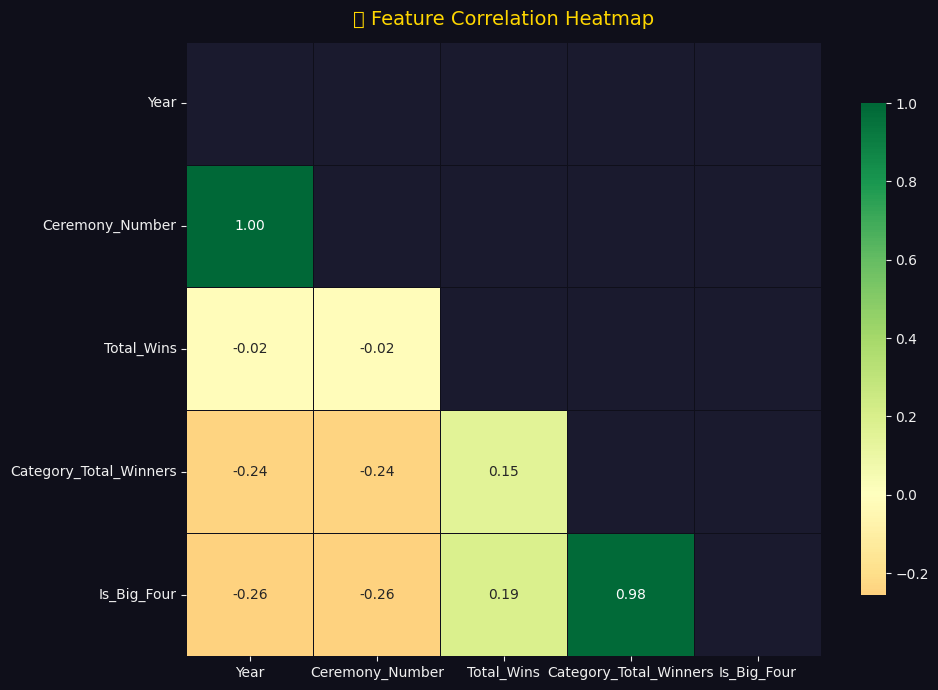

In [12]:
num_cols = df.select_dtypes(include='number').columns.tolist()
corr = df[num_cols].corr()

fig, ax = plt.subplots(figsize=(10, 7))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    corr, mask=mask, annot=True, fmt='.2f',
    cmap='RdYlGn', center=0,
    linewidths=0.5, linecolor='#0f0f1a',
    ax=ax, cbar_kws={'shrink': 0.8}
)
ax.set_title('📊 Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

## 🌌 13 — 3D Scatter: Year × Artist Wins × Category Frequency

In [13]:
# Build per-artist stats across years
artist_year = (
    df.groupby(['Artist', 'Year', 'Award_Group'])
    .size()
    .reset_index(name='Wins')
)
artist_total = df['Artist'].value_counts().rename('Total_Wins')
cat_freq     = df['Category'].value_counts().rename('Cat_Freq')

artist_year['Total_Wins'] = artist_year['Artist'].map(artist_total)
artist_year = artist_year.dropna()

fig = px.scatter_3d(
    artist_year,
    x='Year',
    y='Total_Wins',
    z='Wins',
    color='Award_Group',
    size='Total_Wins',
    hover_name='Artist',
    opacity=0.8,
    color_discrete_sequence=PALETTE,
    title='🌌 3D Scatter — Year × Cumulative Wins × Annual Wins per Artist',
    labels={'Total_Wins': 'Career Wins', 'Wins': 'Wins This Year'},
)
fig.update_layout(
    paper_bgcolor=BG_COLOR,
    font=dict(color=TEXT_COLOR),
    title_font=dict(color=GOLD, size=16),
    scene=dict(
        bgcolor='#1a1a2e',
        xaxis=dict(backgroundcolor='#1a1a2e', gridcolor='#2a2a3e', color=TEXT_COLOR),
        yaxis=dict(backgroundcolor='#1a1a2e', gridcolor='#2a2a3e', color=TEXT_COLOR),
        zaxis=dict(backgroundcolor='#1a1a2e', gridcolor='#2a2a3e', color=TEXT_COLOR),
    ),
    height=650,
)
fig.show()

## 🏔️ 14 — 3D Surface: Decade × Award Group Win Density

In [14]:
# Pivot: rows=Decade, cols=Award_Group, values=count
surface_df = (
    df.groupby(['Decade', 'Award_Group'])
    .size()
    .unstack(fill_value=0)
)

Z = surface_df.values.astype(float)
X_labels = list(surface_df.columns)      # Award Groups
Y_labels = list(surface_df.index)         # Decades
X_idx = list(range(len(X_labels)))
Y_idx = list(range(len(Y_labels)))

fig = go.Figure(data=[go.Surface(
    z=Z,
    x=X_idx,
    y=Y_idx,
    colorscale='Viridis',
    showscale=True,
    colorbar=dict(title='Win Count', titlefont=dict(color=TEXT_COLOR),
                  tickfont=dict(color=TEXT_COLOR))
)])

fig.update_layout(
    title='🏔️ 3D Surface — Win Density by Decade & Award Group',
    title_font=dict(color=GOLD, size=16),
    paper_bgcolor=BG_COLOR,
    font=dict(color=TEXT_COLOR),
    scene=dict(
        bgcolor='#1a1a2e',
        xaxis=dict(
            title='Award Group',
            tickmode='array', tickvals=X_idx, ticktext=X_labels,
            backgroundcolor='#1a1a2e', gridcolor='#2a2a3e', color=TEXT_COLOR
        ),
        yaxis=dict(
            title='Decade',
            tickmode='array', tickvals=Y_idx, ticktext=Y_labels,
            backgroundcolor='#1a1a2e', gridcolor='#2a2a3e', color=TEXT_COLOR
        ),
        zaxis=dict(
            title='Wins', backgroundcolor='#1a1a2e',
            gridcolor='#2a2a3e', color=TEXT_COLOR
        ),
        camera=dict(eye=dict(x=1.6, y=-1.6, z=1.2))
    ),
    height=650,
)
fig.show()

## 🔮 15 — 3D Line: Big Four Winners Through Time

In [15]:
big4_df = (
    df[df['Award_Group'] == 'Big Four']
    .groupby(['Year', 'Category'])
    .size()
    .reset_index(name='Wins')
)

fig = px.line_3d(
    big4_df,
    x='Year',
    y='Category',
    z='Wins',
    color='Category',
    color_discrete_sequence=PALETTE,
    title='🔮 3D Line — Big Four Category Wins Over Time',
)
fig.update_traces(line=dict(width=4))
fig.update_layout(
    paper_bgcolor=BG_COLOR,
    font=dict(color=TEXT_COLOR),
    title_font=dict(color=GOLD, size=16),
    scene=dict(
        bgcolor='#1a1a2e',
        xaxis=dict(backgroundcolor='#1a1a2e', gridcolor='#2a2a3e', color=TEXT_COLOR),
        yaxis=dict(backgroundcolor='#1a1a2e', gridcolor='#2a2a3e', color=TEXT_COLOR),
        zaxis=dict(backgroundcolor='#1a1a2e', gridcolor='#2a2a3e', color=TEXT_COLOR),
    ),
    height=600,
    showlegend=True,
)
fig.show()

## 🤖 16 — Encode Features for Machine Learning



In [16]:
# ── BUG FIX: Use SEPARATE encoders per column ─────────────────────────────────
encoders = {}

df_ml = df.copy()

for col in ['Artist', 'Category', 'Era', 'Decade']:
    le = LabelEncoder()
    df_ml[f'{col}_enc'] = le.fit_transform(df_ml[col].astype(str))
    encoders[col] = le  # store each encoder separately

print('Encoded columns:')
for col, enc in encoders.items():
    print(f'  {col}: {len(enc.classes_)} unique classes')

Encoded columns:
  Artist: 256 unique classes
  Category: 5 unique classes
  Era: 7 unique classes
  Decade: 8 unique classes


## 🎯 17 — Train ML Model: Predict Award Group (Big Four vs Genre)



In [17]:
FEATURES = ['Year', 'Artist_enc', 'Category_enc', 'Era_enc', 'Decade_enc']
TARGET   = 'Award_Group'   # ← correct target (not leaking Category_enc)

X = df_ml[FEATURES]
y = df_ml[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f'Train: {X_train.shape[0]} samples | Test: {X_test.shape[0]} samples')
print(f'Target classes: {y.unique()}')

# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=3,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

acc   = accuracy_score(y_test, pred)
cv    = cross_val_score(rf, X, y, cv=5).mean()

print(f'\n{'─'*45}')
print(f'  Test  Accuracy : {acc:.4f}  ({acc*100:.1f}%)')
print(f'  CV-5  Accuracy : {cv:.4f}  ({cv*100:.1f}%)')
print(f'{'─'*45}')
print(classification_report(y_test, pred))

Train: 233 samples | Test: 78 samples
Target classes: ['Big Four' 'Genre']

─────────────────────────────────────────────
  Test  Accuracy : 0.9615  (96.2%)
  CV-5  Accuracy : 0.6285  (62.8%)
─────────────────────────────────────────────
              precision    recall  f1-score   support

    Big Four       0.96      1.00      0.98        70
       Genre       1.00      0.62      0.77         8

    accuracy                           0.96        78
   macro avg       0.98      0.81      0.87        78
weighted avg       0.96      0.96      0.96        78



## 🔢 18 — Confusion Matrix

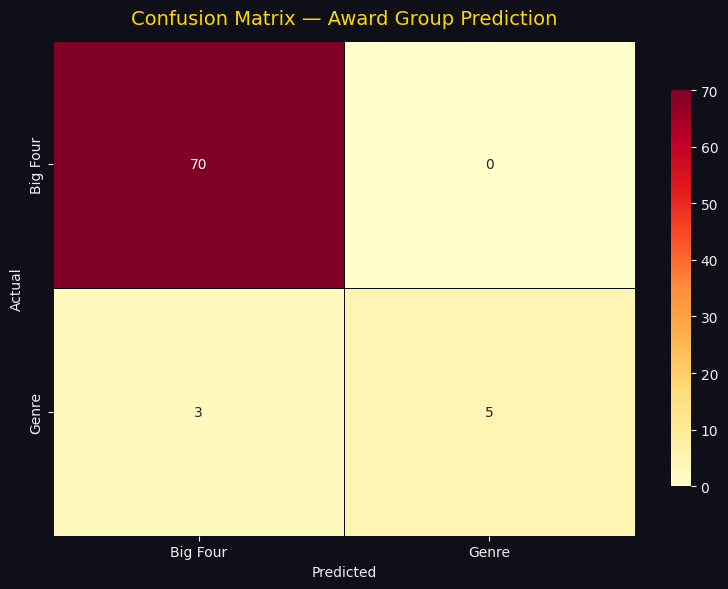

In [18]:
labels = sorted(y.unique())
cm     = confusion_matrix(y_test, pred, labels=labels)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d',
    xticklabels=labels, yticklabels=labels,
    cmap='YlOrRd', linewidths=0.5,
    linecolor='#0f0f1a', ax=ax,
    cbar_kws={'shrink': 0.8}
)
ax.set_title('Confusion Matrix — Award Group Prediction')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

## 📊 19 — Feature Importance

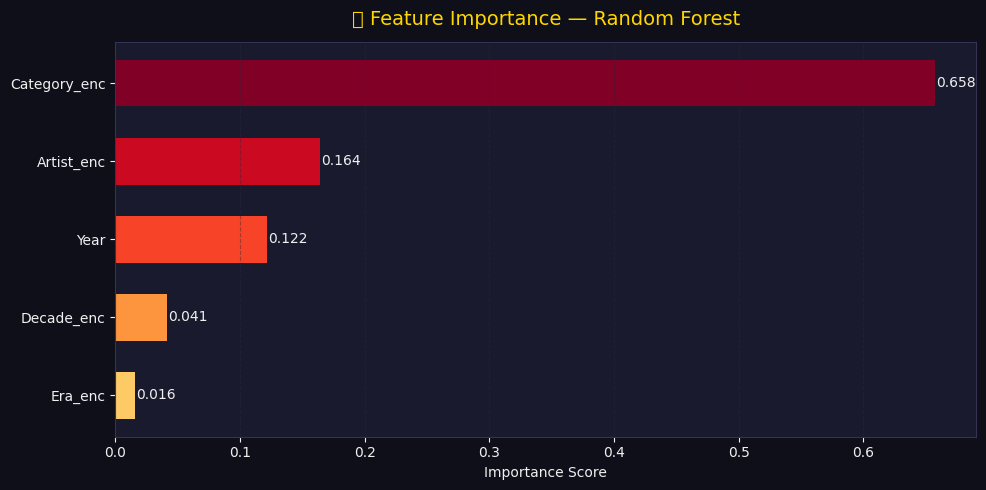

In [19]:
importances = pd.Series(rf.feature_importances_, index=FEATURES).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(10, 5))
cols = plt.cm.YlOrRd(np.linspace(0.3, 1.0, len(importances)))
ax.barh(importances.index, importances.values, color=cols, edgecolor='none', height=0.6)

for i, v in enumerate(importances.values):
    ax.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=10)

ax.set_title('🎯 Feature Importance — Random Forest')
ax.set_xlabel('Importance Score')
ax.grid(axis='x', alpha=0.4)
plt.tight_layout()
plt.show()

## ⭐ 20 — Advanced Artist Success Score

> **Improvement:** Previous score was simply `Wins × 1.2` — a meaningless multiplier. This version uses a weighted formula incorporating wins, longevity, Big Four presence and recent activity.

In [20]:
artist_stats = df.groupby('Artist').agg(
    Total_Wins      = ('Year', 'count'),
    First_Year      = ('Year', 'min'),
    Last_Year       = ('Year', 'max'),
    Big_Four_Wins   = ('Is_Big_Four', 'sum'),
    Unique_Cats     = ('Category', 'nunique'),
).reset_index()

artist_stats['Career_Span']     = (artist_stats['Last_Year'] - artist_stats['First_Year']).clip(lower=1)
artist_stats['Recency_Bonus']   = (artist_stats['Last_Year'] - 1959) / (2026 - 1959)
artist_stats['Big4_Ratio']      = artist_stats['Big_Four_Wins'] / artist_stats['Total_Wins']

# Weighted success score
artist_stats['Success_Score'] = (
    artist_stats['Total_Wins']    * 2.0  +
    artist_stats['Big_Four_Wins'] * 3.5  +
    artist_stats['Career_Span']   * 0.3  +
    artist_stats['Unique_Cats']   * 1.0  +
    artist_stats['Recency_Bonus'] * 2.0
).round(2)

top20 = artist_stats.sort_values('Success_Score', ascending=False).head(20)

print('🏆 Top 20 Artists by Advanced Success Score')
top20[['Artist', 'Total_Wins', 'Big_Four_Wins', 'Career_Span', 'Unique_Cats', 'Success_Score']]

🏆 Top 20 Artists by Advanced Success Score


,Artist,Total_Wins,Big_Four_Wins,Career_Span,Unique_Cats,Success_Score
5,Adele,5,5,8,3,34.63
234,U2,4,4,18,2,30.8
207,Taylor Swift,4,4,14,1,29.14
23,Billie Eilish,4,4,1,3,27.15
77,Frank Sinatra,4,4,7,2,26.34
33,Bonnie Raitt,2,2,33,2,24.81
229,Tony Bennett,2,2,32,2,23.67
158,Paul Simon,3,3,12,2,22.97
151,Norah Jones,3,3,1,3,21.11
68,Eric Clapton,3,3,4,2,20.83


## 🌟 21 — Interactive Success Score Bubble Chart

In [21]:
fig = px.scatter(
    top20,
    x='Career_Span',
    y='Total_Wins',
    size='Success_Score',
    color='Big4_Ratio',
    hover_name='Artist',
    text='Artist',
    color_continuous_scale='YlOrRd',
    size_max=60,
    title='🌟 Top 20 Artists — Career Span vs Wins (bubble = Success Score)',
    labels={'Career_Span': 'Career Span (years)', 'Total_Wins': 'Total Wins',
            'Big4_Ratio': 'Big 4 Win Ratio'},
)
fig.update_traces(textposition='top center')
fig.update_layout(**PLOTLY_TEMPLATE['layout'].to_plotly_json())
fig.update_layout(height=560)
fig.show()

## 💾 22 — Export Clean Data

In [22]:
df.to_csv('cleaned_grammy_data.csv', index=False)
artist_stats.to_csv('artist_success_scores.csv', index=False)

print('✅  Saved cleaned_grammy_data.csv')
print('✅  Saved artist_success_scores.csv')
print(f'\nFinal dataset: {df.shape[0]} rows × {df.shape[1]} columns')

✅  Saved cleaned_grammy_data.csv
✅  Saved artist_success_scores.csv

Final dataset: 311 rows × 14 columns
